# Diabetic retinopathy 
http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set


#### Imports

In [1]:
import pandas as pd
import scipy.io
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Data Pre Processing

### Abstract: This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not.


Data Set Characteristics:  Multivariate

Number of Instances: 1151

Area: Life

Attribute Characteristics: Integer, Real

Number of Attributes: 20

Date Donated 2014-11-03

Associated Tasks: Classification

Missing Values: N/A

Number of Web Hits:98721

In [2]:
df = pd.read_csv('messidor_features.csv')

In [3]:
df.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


### Dataset has 1151 records

In [4]:
df.describe()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


### No missing (N/A values)

In [5]:
df.isnull().sum()

attribute1     0
attribute2     0
attribute3     0
attribute4     0
attribute5     0
attribute6     0
attribute7     0
attribute8     0
attribute9     0
attribute10    0
attribute11    0
attribute12    0
attribute13    0
attribute14    0
attribute15    0
attribute16    0
attribute17    0
attribute18    0
attribute19    0
attribute20    0
dtype: int64

## Data set has 20 attributes

In [6]:
attributes = df.columns.values
print("Features : {}".format(attributes))

Features : ['attribute1' 'attribute2' 'attribute3' 'attribute4' 'attribute5'
 'attribute6' 'attribute7' 'attribute8' 'attribute9' 'attribute10'
 'attribute11' 'attribute12' 'attribute13' 'attribute14' 'attribute15'
 'attribute16' 'attribute17' 'attribute18' 'attribute19' 'attribute20']


## Attribute Information:

## Features attribute1-attribute19

##### QA
* 1 The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.

#### PS
* 2 The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.

#### MA_1 - MA6
* 3-8 The results of MA detection. Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.

#### EX_1 - EX_8
* 9-16 contain the same information as 2-7) for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.

### ED
* 17 The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patients condition. This feature is also normalized with the diameter of the ROI.

#### D
* 18 The diameter of the optic disc.

#### BR
* 19 The binary result of the AM/FM-based classification.


## Label - Attribute20

#### Label
* 20 Class label.
### 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3)
### 0 = no signs of DR

In [7]:
columns = ["QA", 
           "PS",
           "MA_1", "MA_2", "MA_3", "MA_4", "MA_5", "MA_6",
           "EX_1", "EX_2", "EX_3", "EX_4", "EX_5", "EX_6", "EX_7", "EX_8",
           "ED",
           "D",
           "BR",
           "Label"
]

In [8]:
DR_df = pd.DataFrame(df.values, columns=columns)

In [9]:
DR_df.head()

,QA,PS,MA_1,MA_2,MA_3,MA_4,MA_5,MA_6,EX_1,EX_2,EX_3,EX_4,EX_5,EX_6,EX_7,EX_8,ED,D,BR,Label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1.0


## Checking for correlations

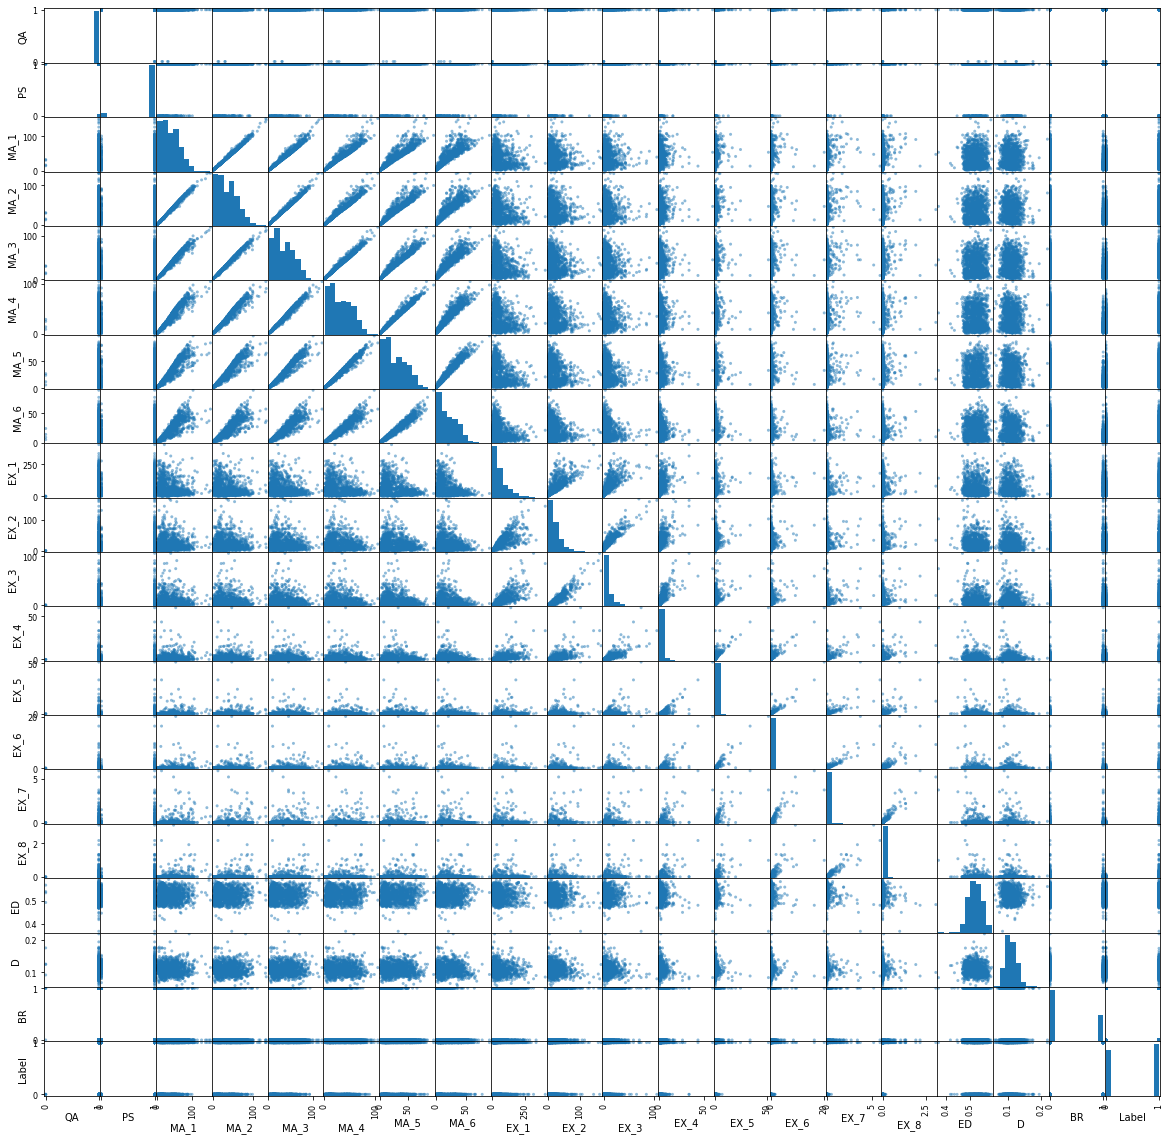

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(DR_df, figsize=(20, 20))
plt.show()

#### Let's check what is the most correlated feature for our label

In [11]:
corr_matrix = DR_df.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label    1.000000
MA_1     0.292603
MA_2     0.266338
MA_3     0.234691
MA_4     0.197511
EX_7     0.184772
EX_8     0.177313
MA_5     0.161631
EX_6     0.151424
EX_5     0.142273
MA_6     0.127861
EX_4     0.104254
QA       0.062816
EX_1     0.058015
EX_3     0.038281
ED       0.008466
EX_2     0.000479
D       -0.030868
BR      -0.042144
PS      -0.076925
Name: Label, dtype: float64

## According to correlation analysis MA_1 has the most correlation value but it is also less than 0.3000 

### Let's check average of MA values

In [12]:
DR_df["MA_AVG"] = (DR_df["MA_1"] + DR_df["MA_2"] + DR_df["MA_3"]) / 3

In [13]:
corr_matrix = DR_df.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label     1.000000
MA_1      0.292603
MA_AVG    0.266369
MA_2      0.266338
MA_3      0.234691
MA_4      0.197511
EX_7      0.184772
EX_8      0.177313
MA_5      0.161631
EX_6      0.151424
EX_5      0.142273
MA_6      0.127861
EX_4      0.104254
QA        0.062816
EX_1      0.058015
EX_3      0.038281
ED        0.008466
EX_2      0.000479
D        -0.030868
BR       -0.042144
PS       -0.076925
Name: Label, dtype: float64

#### Average MA does not improve the correlation 

## Since all MA values has correlations we can use only MA_1 because it has the highest corretion with Label

## Check the average of All EX values

In [14]:
DR_df["EX_AVG"] = ( DR_df["EX_6"] + DR_df["EX_7"] + DR_df["EX_8"]) / 8

In [15]:
corr_matrix = DR_df.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label     1.000000
MA_1      0.292603
MA_AVG    0.266369
MA_2      0.266338
MA_3      0.234691
MA_4      0.197511
EX_7      0.184772
EX_8      0.177313
EX_AVG    0.167797
MA_5      0.161631
EX_6      0.151424
EX_5      0.142273
MA_6      0.127861
EX_4      0.104254
QA        0.062816
EX_1      0.058015
EX_3      0.038281
ED        0.008466
EX_2      0.000479
D        -0.030868
BR       -0.042144
PS       -0.076925
Name: Label, dtype: float64

###### The most relevent feature is EX_7 

## Spliting the datset

In [16]:
DR_df = DR_df.drop("EX_AVG", axis=1)
DR_df = DR_df.drop("MA_AVG", axis=1)

In [17]:
X = DR_df.drop("Label", axis=1)
y = DR_df["Label"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Trainig and Validation

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #For testing Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [25]:
def get_predicitons(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    clf.fit(X_train, y_train)
    clf_predict = svc_clf.predict(X_test)
    clf_acore = accuracy_score(y_test, clf_predict)
    rs = recall_score(y_test, clf_predict)
    ps = precision_score(y_test, clf_predict)
    
    print("Accuracy        = {:2f}%".format(clf_acore * 100)) #Accuracy For without setting any hiperparameter manually
    print("Recall Score    = {:2f}".format(rs))
    print("Precision Score = {:2f}".format(ps))
    
    
    #Confusion Metrix
    print("Confusion Matrix...\n")
    
    q = confusion_matrix(y_test, clf_predict)
    print(q)
    plt.matshow(q)
    plt.show()
    
    return clf_acore, rs, ps
    
    

In [26]:
def get_predictions_advanced(clf, scaled=False):
    if scaled:
        get_predicitons(clf, X_train=X_train_scaled, X_test=X_test_scaled)
    else:
        get_predicitons(clf)

In [27]:
def get_all_predictions(clf):
    print("Classifier for non Scaled features......\n")
    get_predictions_advanced(clf)
    
    print("Classifier for Scaled features..........\n")
    get_predictions_advanced(clf, scaled=True)
    

## SVC 

Classifier for non Scaled features......

Accuracy        = 65.800866%
Recall Score    = 0.523438
Precision Score = 0.788235
Confusion Matrix...

[[85 18]
 [61 67]]


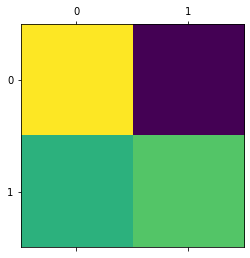

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


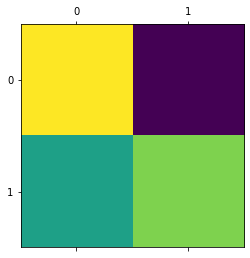

In [28]:
svc_clf = SVC()
get_all_predictions(svc_clf)

### So we can clearly see an improvement when the features are scaled

### Changing the Hiperparameters

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


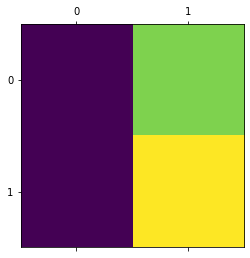

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


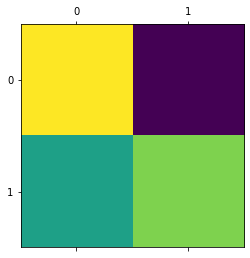

In [29]:
svc_clf_1 = SVC(gamma='scale')
get_all_predictions(svc_clf_1)

### Changing Kernel

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


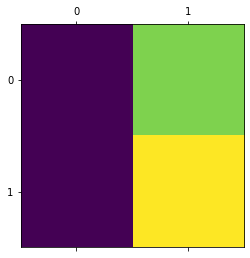

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


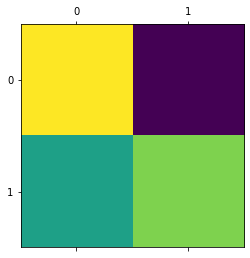

In [30]:
svc_clf_2 = SVC(kernel="poly")
get_all_predictions(svc_clf_2)

## Linear Classifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


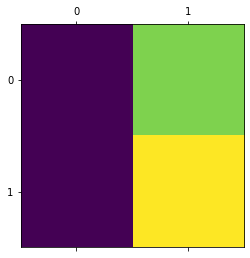

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


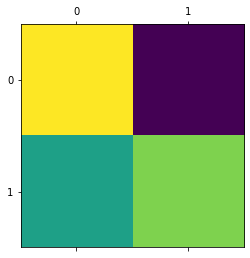

In [31]:
sgd_clf = SGDClassifier()
get_all_predictions(sgd_clf)

### KNeighborsClassifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


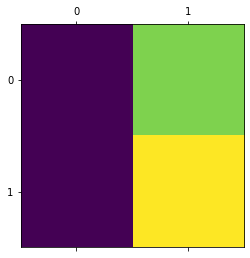

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


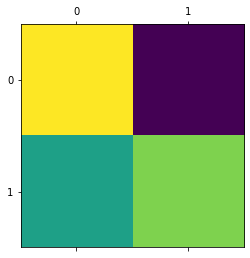

In [32]:
clf = KNeighborsClassifier()
get_all_predictions(clf)

### MLPClassifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


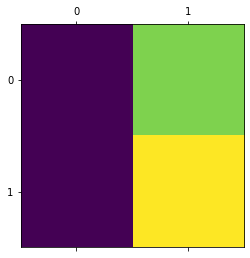

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


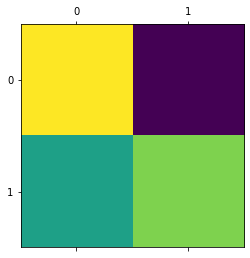

In [33]:
clf = MLPClassifier(alpha=1, max_iter=1000)
get_all_predictions(clf)

### GaussianProcessClassifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


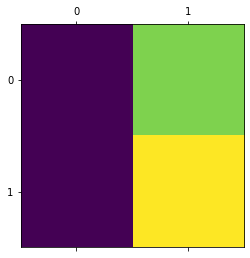

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


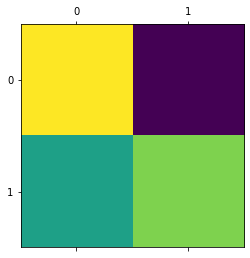

In [34]:
sgd_clf = GaussianProcessClassifier()
get_all_predictions(sgd_clf)

### DecisionTreeClassifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


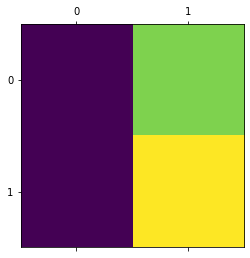

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


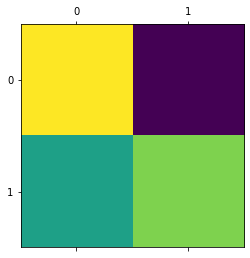

In [35]:
sgd_clf = DecisionTreeClassifier(max_depth=5)
get_all_predictions(sgd_clf)

### RandomForestClassifier

Classifier for non Scaled features......

Accuracy        = 55.411255%
Recall Score    = 1.000000
Precision Score = 0.554113
Confusion Matrix...

[[  0 103]
 [  0 128]]


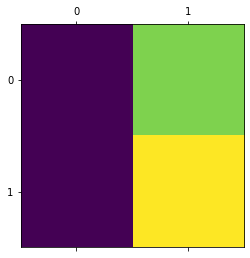

Classifier for Scaled features..........

Accuracy        = 67.965368%
Recall Score    = 0.562500
Precision Score = 0.800000
Confusion Matrix...

[[85 18]
 [56 72]]


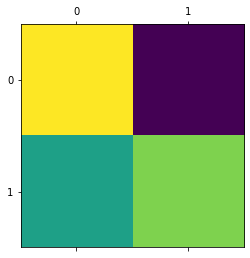

In [36]:
sgd_clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
get_all_predictions(sgd_clf)    

In [1]:
########################## END ####################################################